In [17]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from main import cnn_model_fn, iterated_model
from matplotlib import pyplot as plt

tf.logging.set_verbosity(tf.logging.WARN)

In [10]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [11]:
eval_data.shape, eval_data.dtype

((10000, 784), dtype('float32'))

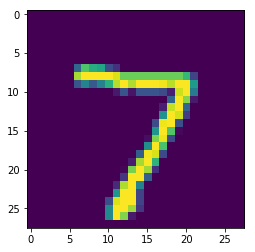

In [12]:
plt.imshow(eval_data[0].reshape([28, 28]))

In [13]:
estimator = tf.estimator.Estimator(model_fn=iterated_model, model_dir='./model_data',)
model_vars = estimator.get_variable_names()
model_vars
model_vars.remove('global_step')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model_data', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f75c6a8f668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
x = tf.placeholder(shape=[None, 28 * 28], dtype=tf.float32)
cnn_model_fn({'x': x}, {}, mode=tf.estimator.ModeKeys.PREDICT)

EstimatorSpec(mode='infer', predictions={'classes': <tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>, 'probabilities': <tf.Tensor 'softmax_tensor_1:0' shape=(?, 10) dtype=float32>}, loss=None, train_op=None, eval_metric_ops={}, export_outputs=None, training_chief_hooks=(), training_hooks=(), scaffold=<tensorflow.python.training.monitored_session.Scaffold object at 0x7f75c6a5d2e8>, evaluation_hooks=(), prediction_hooks=())

In [15]:
import re
graph = tf.get_default_graph()
iterations = [
    op.outputs[0] for op in graph.get_operations()
    if re.search(r'iteration.*/Relu', op.name)
]
variables = {graph.get_tensor_by_name(name + ':0'): estimator.get_variable_value(name) for name in model_vars}

iterations

KeyError: "The name 'iteration/conv2d/bias:0' refers to a Tensor which does not exist. The operation, 'iteration/conv2d/bias', does not exist in the graph."

In [ ]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    values = session.run(iterations, feed_dict={x: [eval_data[2]], **variables})
    
for iteration in values:
    fig = plt.figure(figsize=(15,10))
    axes = fig.subplots(1, 10)
    for i in range(10):
        axes[i].imshow(iteration[0, :, :, i])